In [1]:
import numpy as np 
import pandas as pd 
import io
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### Let's take a look at data.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### We can see that there are lots of missing values. I will handle missing data shortly. For now, let's learn more about the data.

In [5]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
character_col_names = []
for y in train_df.columns:
    if(train_df[y].dtype != np.float64 and train_df[y].dtype != np.int64):
          character_col_names.append(y)
character_col_names

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [8]:
len(character_col_names)

43

In [9]:
numeric_col_names = []
for i in train_df.columns:
    if i not in character_col_names:
        numeric_col_names.append(i)

In [10]:
len(numeric_col_names)

38

### There are 43 character features and 38 numerical features.

In [11]:
train_df.isnull().any(axis = 0).sum()

19

### There are 19 columns with missing values.

C:\Users\denni\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

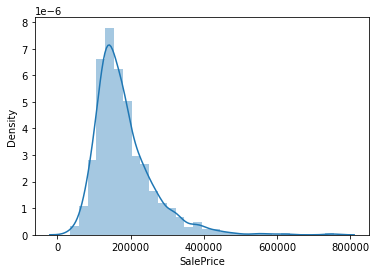

In [12]:
sns.distplot(train_df["SalePrice"],bins=30)

### We can see that SalePrice (target variable) is slightly right-skewed given that there are fewer houses with higher sale price. To solve this, we need to use log transformation to make SalePrice normally distributed. Let's do this in Feature Engineering section.

### Let's take a look at other features.

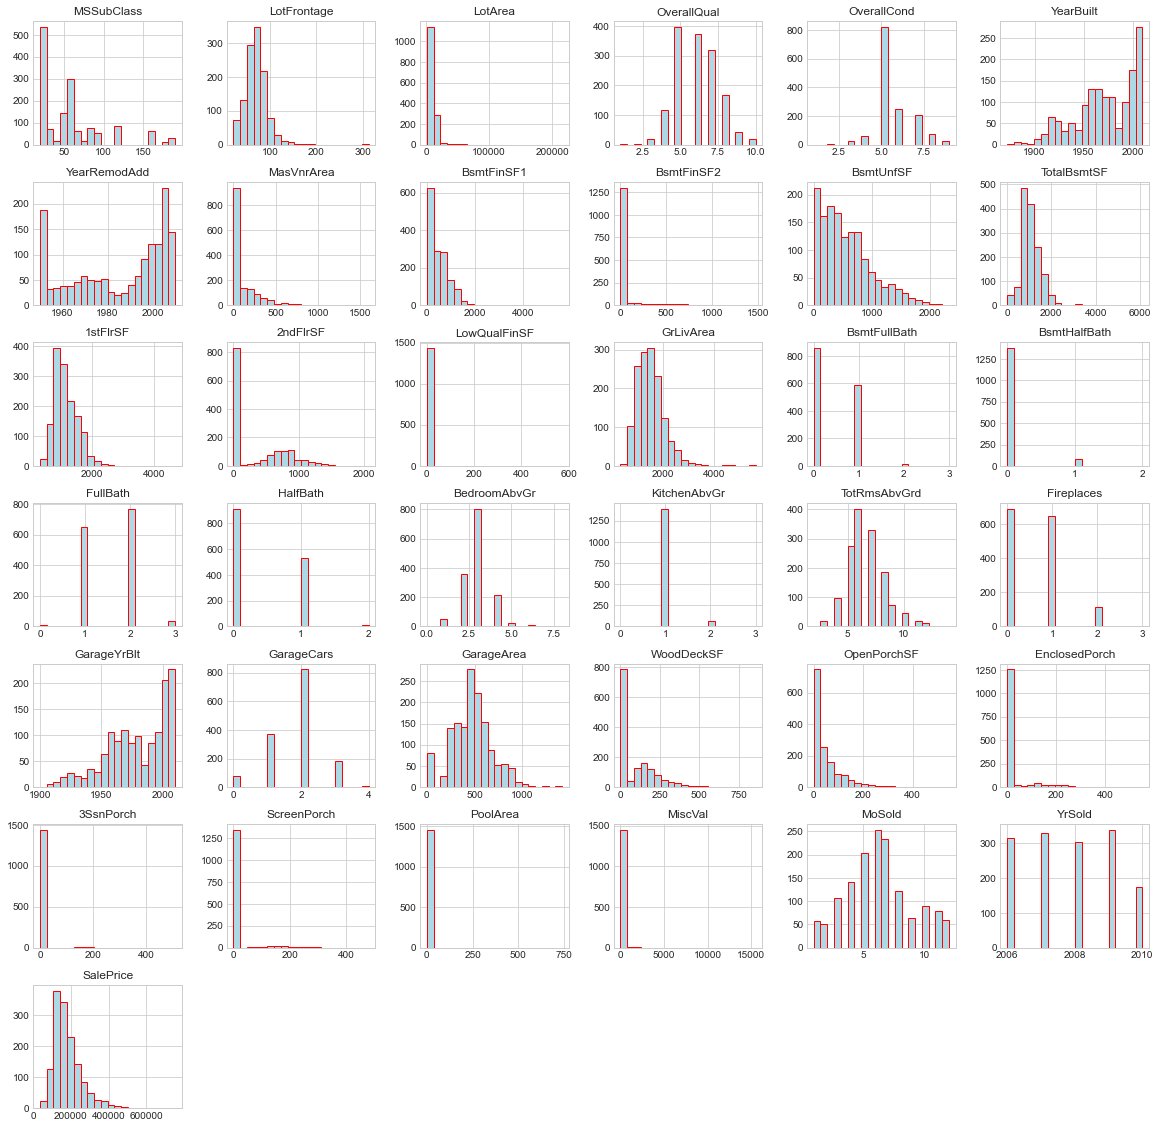

In [13]:
plt.style.use('seaborn-whitegrid')

train_df.iloc[:,1:].hist(bins=20, figsize=(20,20), color='lightblue', edgecolor = 'red')
plt.show()

### Before we look at categorical values, we can examine correlations between SalePrice and numerical features.

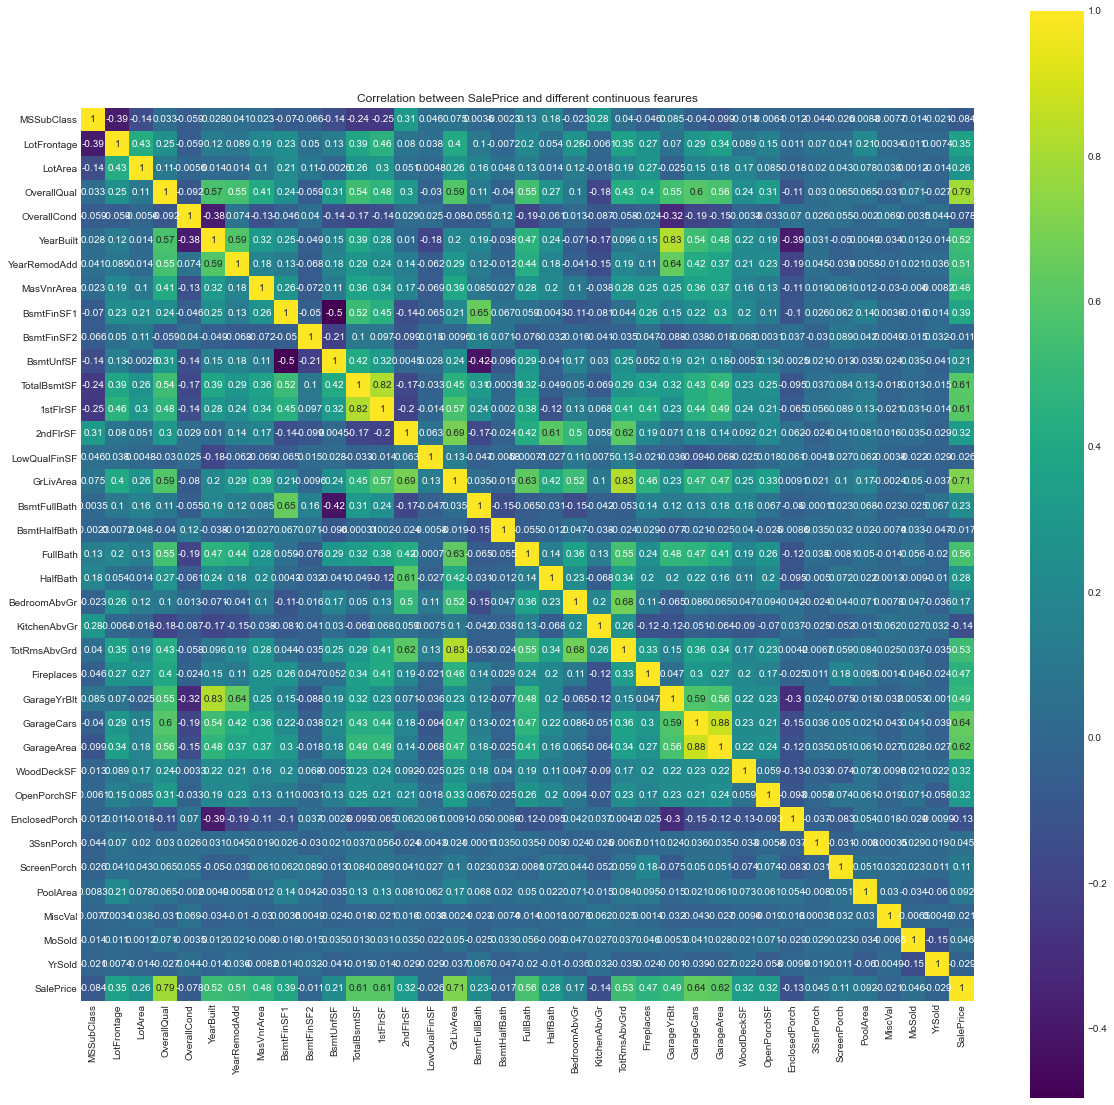

In [14]:
def correlation_heatmap(dataframe,l,w):
    corr = dataframe.corr()
    
    plt.figure(figsize=(l,w))
    sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='viridis')
    
    plt.title('Correlation between SalePrice and different continuous fearures')
    plt.show();
    
cleandf = train_df.iloc[:,1:]
correlation_heatmap(cleandf, 20,20)

### Features that has highest correlations with SalePrice  are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd.

### Let's plot some of the features to see how it relates with SalePrice.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

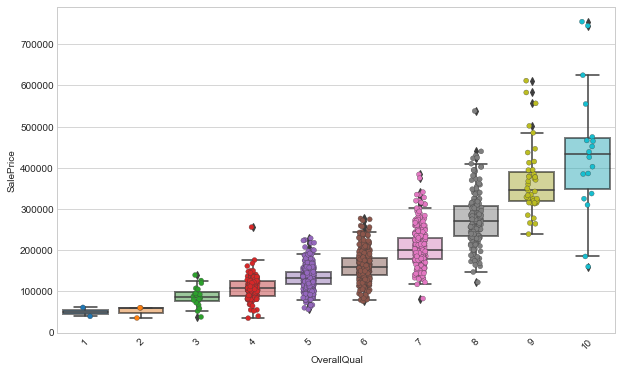

In [15]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
sns.stripplot(x='OverallQual', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### As expected, we can see that SalePrice increases as overall quality increases. Majority of houses have overall quality between 3 and 8.

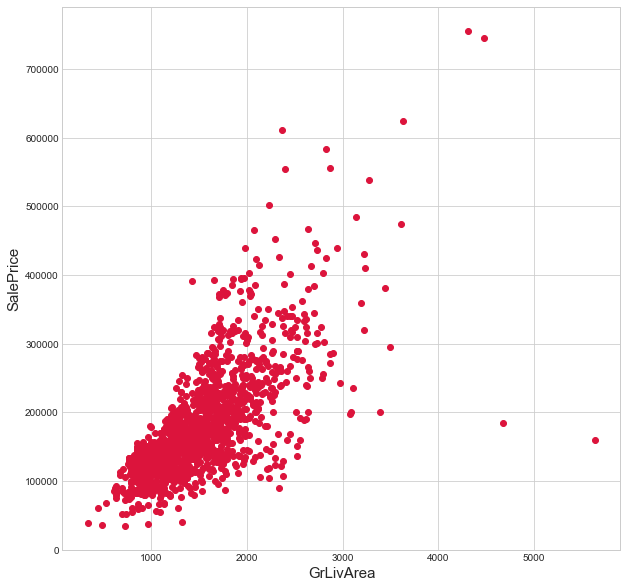

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], c='crimson')

plt.xlabel('GrLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

### Bigger above ground living area in square feet tends to have higher SalePrice.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

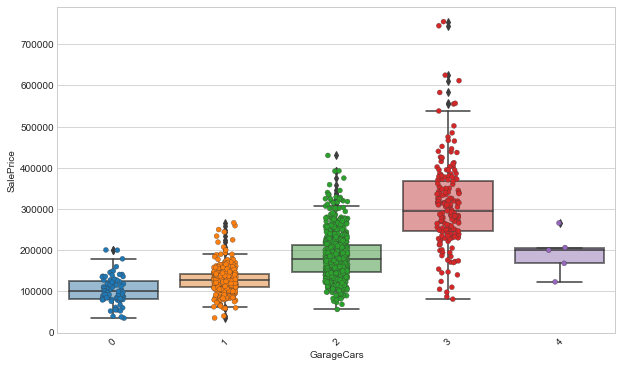

In [17]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='GarageCars', y='SalePrice', data=train_df)
sns.stripplot(x='GarageCars', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### We can see that SalePrice generally increases until the size of garage in car capacity is 3.

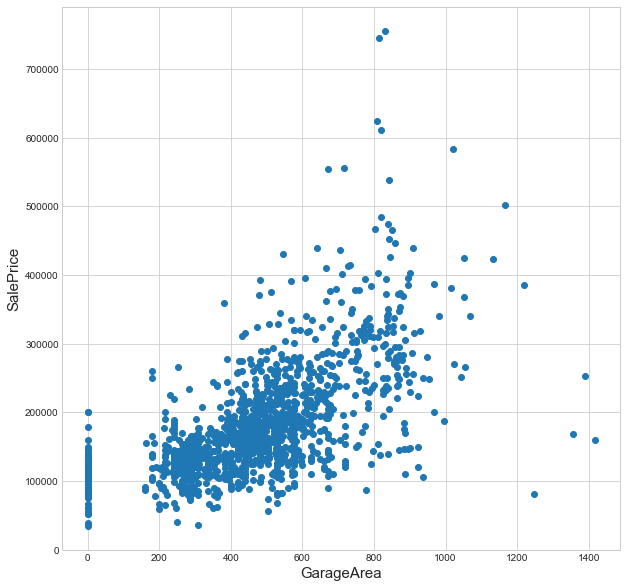

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(train_df['GarageArea'], train_df['SalePrice'])

plt.xlabel('GarageArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

### Although there are some outliers, SalePrice increases with size of garage in square feet.

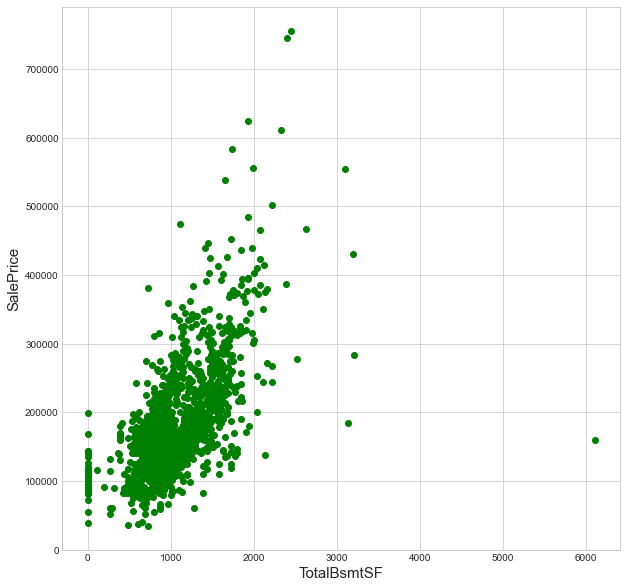

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(train_df['TotalBsmtSF'], train_df['SalePrice'],c='green')

plt.xlabel('TotalBsmtSF', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.show()

### Similar to ground area feature, higher total square feet of basement area leads to higher SalePrice.

### Rest of numerical features are displayed here.

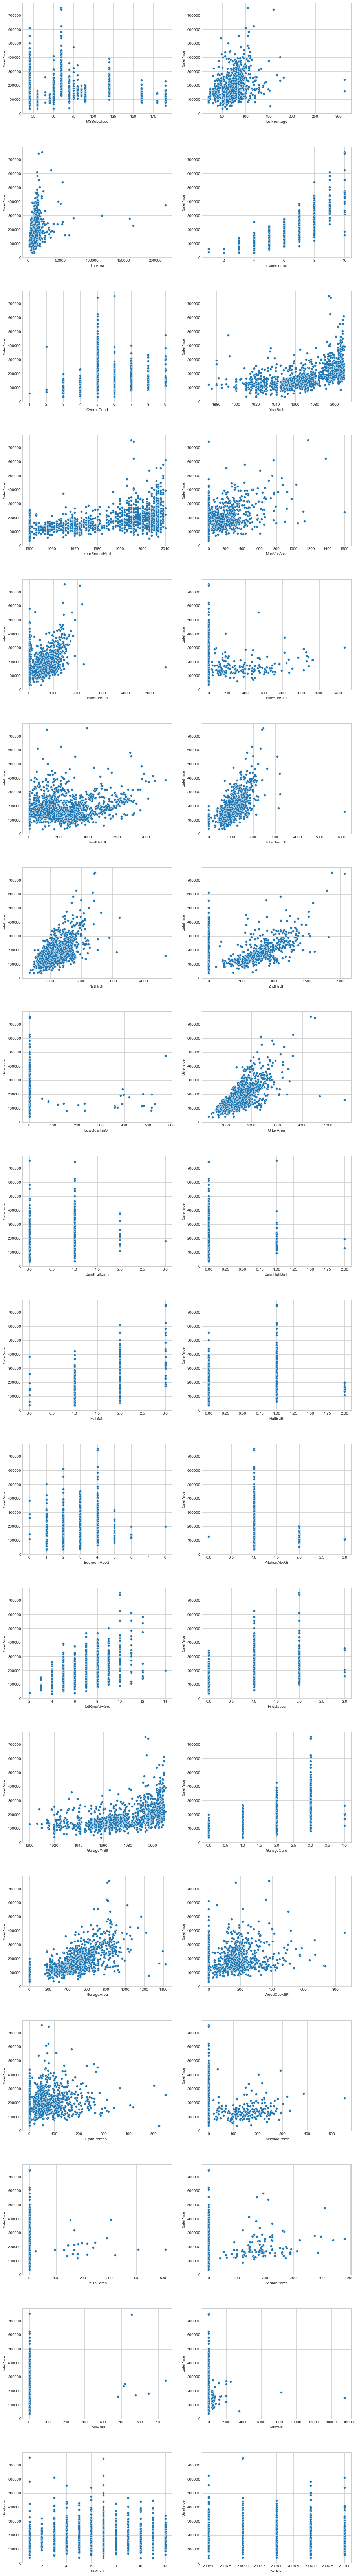

In [20]:
fig, ax = plt.subplots(18, 2, figsize=(15, 120))
plt.subplots_adjust(hspace=0.3)

# exlcude id and SalePrice
for i, feature in enumerate(numeric_col_names[1:-1]): 
    plt.subplot(18, 2, i+1)
    sns.scatterplot(data=train_df, x=feature, y='SalePrice')

### Let's look at character/categorical features as well.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

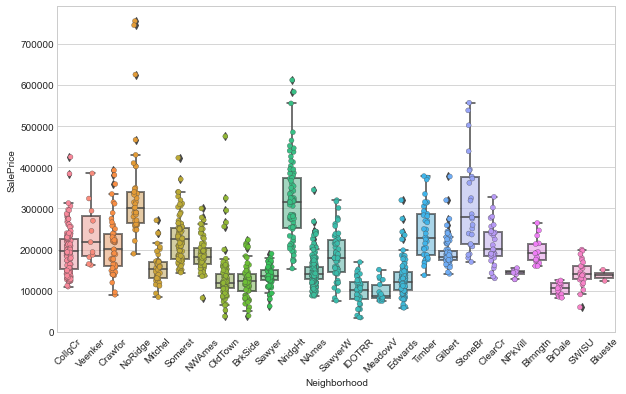

In [21]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
sns.stripplot(x='Neighborhood', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### We can easily discover and distinguish neighborhoods that have higher SalePrice than others.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RL'),
  Text(1, 0, 'RM'),
  Text(2, 0, 'C (all)'),
  Text(3, 0, 'FV'),
  Text(4, 0, 'RH')])

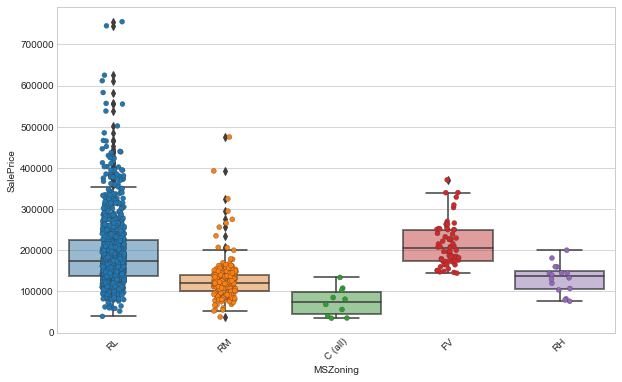

In [22]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='MSZoning', y='SalePrice', data=train_df)
sns.stripplot(x='MSZoning', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### Majority of houses are located in Residential Low Density area. Houses located in Commercial zone have significantly lower SalePrice than houses in other zones.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Gd'), Text(1, 0, 'TA'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

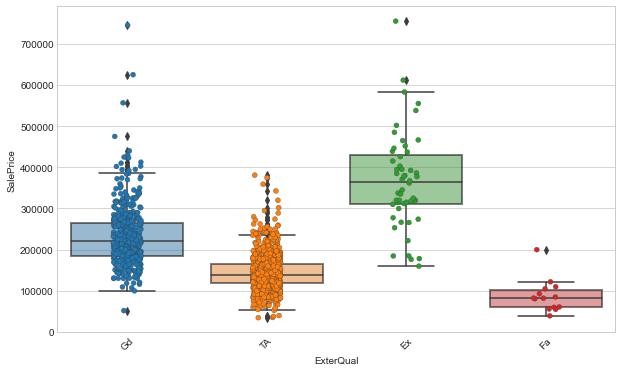

In [23]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='ExterQual', y='SalePrice', data=train_df)
sns.stripplot(x='ExterQual', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Gd'), Text(1, 0, 'TA'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

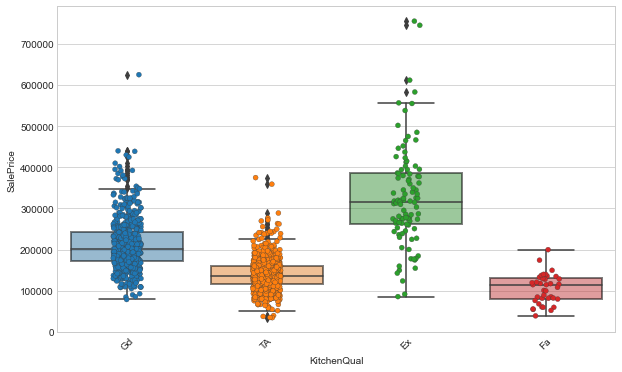

In [24]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='KitchenQual', y='SalePrice', data=train_df)
sns.stripplot(x='KitchenQual', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Gd'), Text(1, 0, 'TA'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

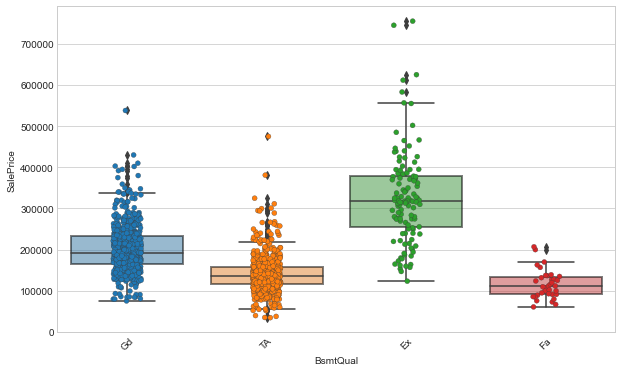

In [25]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtQual', y='SalePrice', data=train_df)
sns.stripplot(x='BsmtQual', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Ex'),
  Text(1, 0, 'Gd'),
  Text(2, 0, 'TA'),
  Text(3, 0, 'Fa'),
  Text(4, 0, 'Po')])

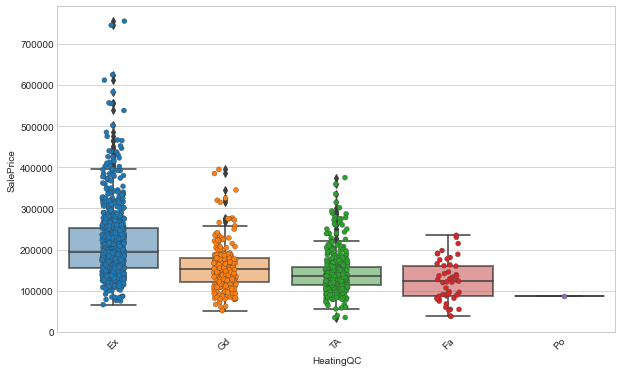

In [26]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='HeatingQC', y='SalePrice', data=train_df)
sns.stripplot(x='HeatingQC', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### Similar to OverallQual, higher ExterQual, KitchenQual, BsmtQual and HeatingQC leads to higher SalePrice.

### Rest of character/categorical features are displayed here.

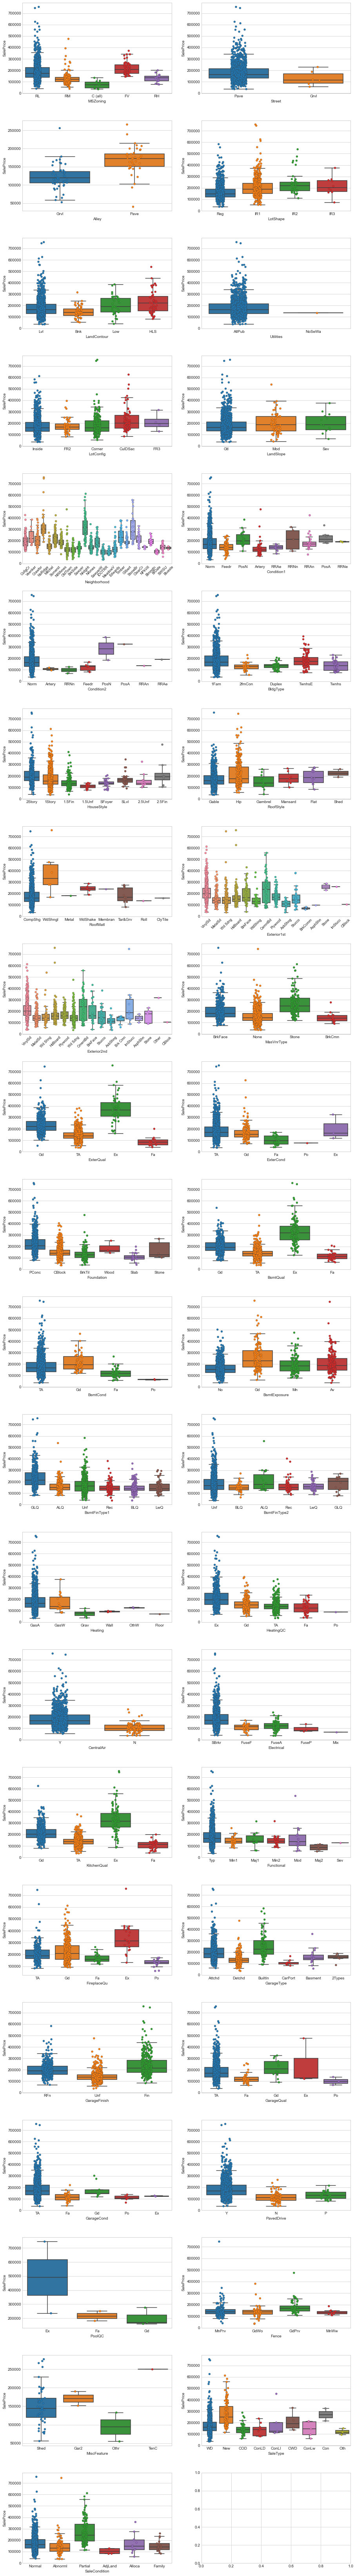

In [27]:
fig, ax = plt.subplots(22, 2, figsize=(15, 120))
plt.subplots_adjust(hspace=0.3)

for i, feature in enumerate(character_col_names):
    plt.subplot(22, 2, i+1)
    sns.boxplot(x=feature, data=train_df, y='SalePrice', showfliers=False) # stage 2
    sns.stripplot(x=feature, data=train_df, y='SalePrice', linewidth=0.3)
    if train_df[feature].nunique() > 10:
        plt.tick_params(axis='x', labelsize=9, labelrotation=45)

### Feature Engineering/Data pre-processing

### Let's use log transformation to make SalePrice normally distributed.

C:\Users\denni\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


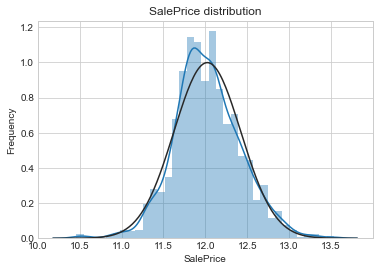

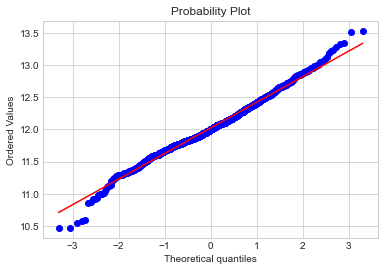

In [28]:
# apply log(1+x) to SalePrice
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

sns.distplot(train_df['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [29]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]

y_train = train_df.SalePrice.values

all_data_df = pd.concat((train_df, test_df)).reset_index(drop=True)

In [30]:
all_data_df.shape

(2919, 81)

### Handling missing data: Since we already have a lot of features, delete columns that has a lot of missing data

In [31]:
all_data_df = all_data_df.drop('Alley', 1)
all_data_df = all_data_df.drop('PoolQC', 1)
all_data_df = all_data_df.drop('Fence', 1)
all_data_df = all_data_df.drop('MiscFeature', 1)
all_data_df = all_data_df.drop('FireplaceQu', 1)

In [32]:
train_df['Utilities'].value_counts()       

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### Drop Utilities feature since only one row has NoSeWa type and the rest of the data has AllPub type.

In [33]:
all_data_df = all_data_df.drop('Utilities', 1)

### We can also drop highly correlated variables. For example, (GarageYrBlt and YearBuilt) and (GrLivArea and TotRmsAbvGrd) have a correlation of 0.83. GarageCars and GarageArea have a correlation of 0.88.

In [34]:
all_data_df = all_data_df.drop('GarageYrBlt', 1)
all_data_df = all_data_df.drop('TotRmsAbvGrd', 1)
all_data_df = all_data_df.drop('GarageArea', 1)

In [35]:
train_df['Exterior1st'].value_counts()       

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [36]:
train_df['Exterior2nd'].value_counts()       

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'VinylSd'),
  Text(1, 0, 'MetalSd'),
  Text(2, 0, 'Wd Sdng'),
  Text(3, 0, 'HdBoard'),
  Text(4, 0, 'BrkFace'),
  Text(5, 0, 'WdShing'),
  Text(6, 0, 'CemntBd'),
  Text(7, 0, 'Plywood'),
  Text(8, 0, 'AsbShng'),
  Text(9, 0, 'Stucco'),
  Text(10, 0, 'BrkComm'),
  Text(11, 0, 'AsphShn'),
  Text(12, 0, 'Stone'),
  Text(13, 0, 'ImStucc'),
  Text(14, 0, 'CBlock')])

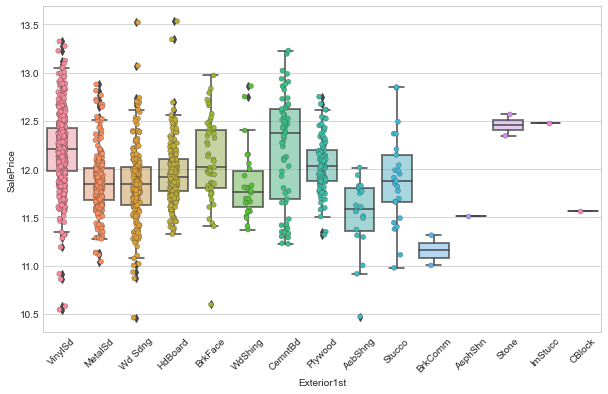

In [37]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Exterior1st', y='SalePrice', data=train_df)
sns.stripplot(x='Exterior1st', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'VinylSd'),
  Text(1, 0, 'MetalSd'),
  Text(2, 0, 'Wd Shng'),
  Text(3, 0, 'HdBoard'),
  Text(4, 0, 'Plywood'),
  Text(5, 0, 'Wd Sdng'),
  Text(6, 0, 'CmentBd'),
  Text(7, 0, 'BrkFace'),
  Text(8, 0, 'Stucco'),
  Text(9, 0, 'AsbShng'),
  Text(10, 0, 'Brk Cmn'),
  Text(11, 0, 'ImStucc'),
  Text(12, 0, 'AsphShn'),
  Text(13, 0, 'Stone'),
  Text(14, 0, 'Other'),
  Text(15, 0, 'CBlock')])

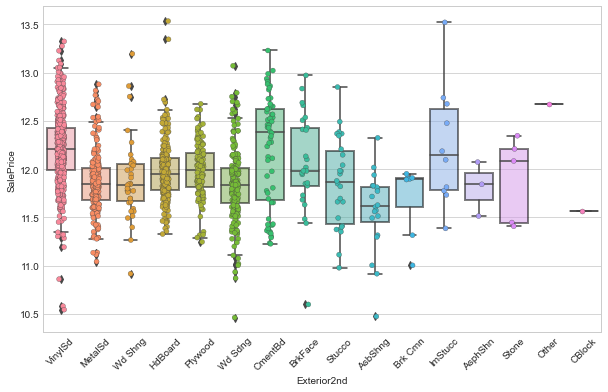

In [38]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Exterior2nd', y='SalePrice', data=train_df)
sns.stripplot(x='Exterior2nd', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### Exterior1st and Exterior2nd don't seem to display relationships between SalePrice. Moreover, since each exterior feature has 16 categories, it will create too many dummy variables in one-hot encoding process. Let's drop these features.

In [39]:
all_data_df = all_data_df.drop('Exterior1st', 1)
all_data_df = all_data_df.drop('Exterior2nd', 1)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Gd'),
  Text(2, 0, 'Fa'),
  Text(3, 0, 'Po'),
  Text(4, 0, 'Ex')])

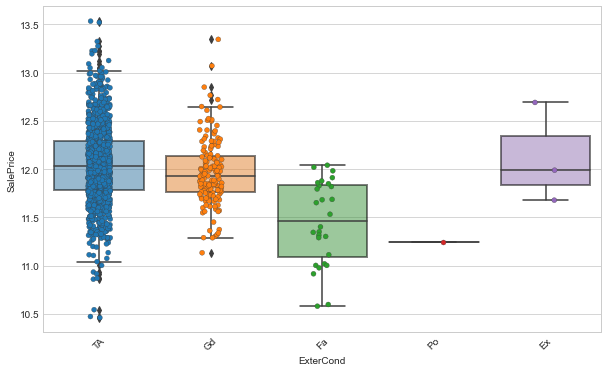

In [40]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='ExterCond', y='SalePrice', data=train_df)
sns.stripplot(x='ExterCond', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### There aren't much data on Po and Ex categories in ExterCond. Let's drop ExterCond as well.

In [41]:
all_data_df = all_data_df.drop('ExterCond', 1)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Fa'),
  Text(2, 0, 'Gd'),
  Text(3, 0, 'Ex'),
  Text(4, 0, 'Po')])

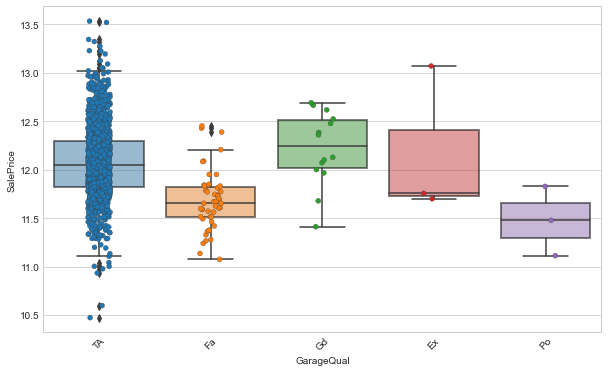

In [42]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='GarageQual', y='SalePrice', data=train_df)
sns.stripplot(x='GarageQual', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45) 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Fa'),
  Text(2, 0, 'Gd'),
  Text(3, 0, 'Po'),
  Text(4, 0, 'Ex')])

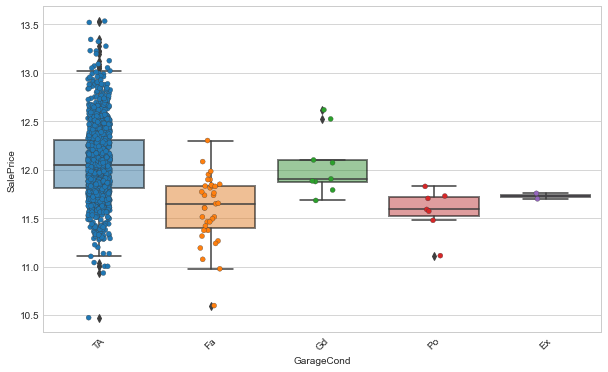

In [43]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='GarageCond', y='SalePrice', data=train_df)
sns.stripplot(x='GarageCond', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45) 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'CompShg'),
  Text(1, 0, 'WdShngl'),
  Text(2, 0, 'Metal'),
  Text(3, 0, 'WdShake'),
  Text(4, 0, 'Membran'),
  Text(5, 0, 'Tar&Grv'),
  Text(6, 0, 'Roll'),
  Text(7, 0, 'ClyTile')])

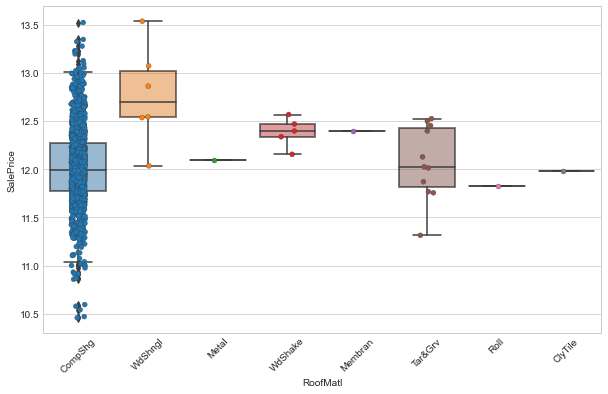

In [44]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='RoofMatl', y='SalePrice', data=train_df)
sns.stripplot(x='RoofMatl', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Gable'),
  Text(1, 0, 'Hip'),
  Text(2, 0, 'Gambrel'),
  Text(3, 0, 'Mansard'),
  Text(4, 0, 'Flat'),
  Text(5, 0, 'Shed')])

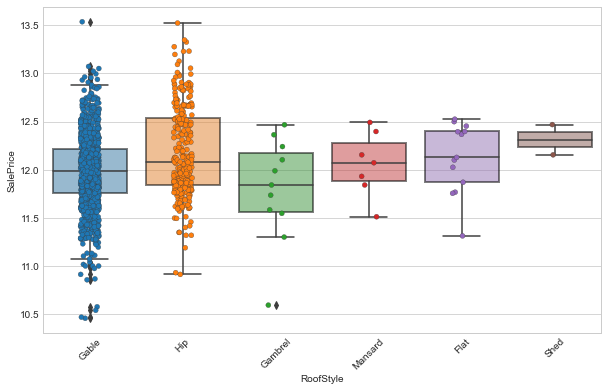

In [45]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='RoofStyle', y='SalePrice', data=train_df)
sns.stripplot(x='RoofStyle', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Pave'), Text(1, 0, 'Grvl')])

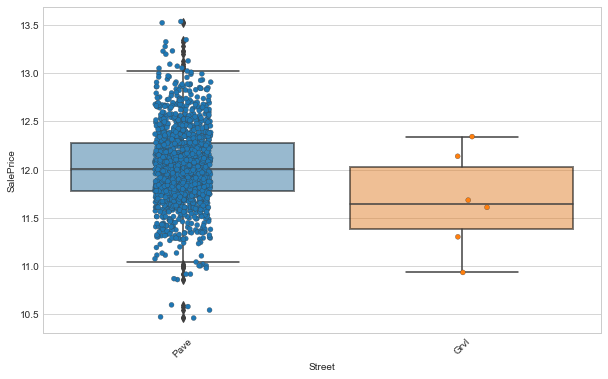

In [46]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Street', y='SalePrice', data=train_df)
sns.stripplot(x='Street', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Norm'),
  Text(1, 0, 'Artery'),
  Text(2, 0, 'RRNn'),
  Text(3, 0, 'Feedr'),
  Text(4, 0, 'PosN'),
  Text(5, 0, 'PosA'),
  Text(6, 0, 'RRAn'),
  Text(7, 0, 'RRAe')])

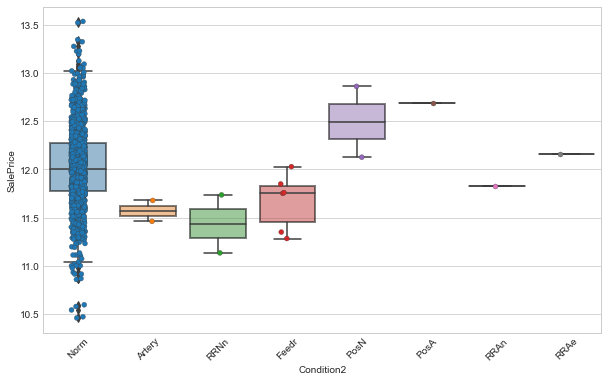

In [47]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Condition2', y='SalePrice', data=train_df)
sns.stripplot(x='Condition2', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'GasA'),
  Text(1, 0, 'GasW'),
  Text(2, 0, 'Grav'),
  Text(3, 0, 'Wall'),
  Text(4, 0, 'OthW'),
  Text(5, 0, 'Floor')])

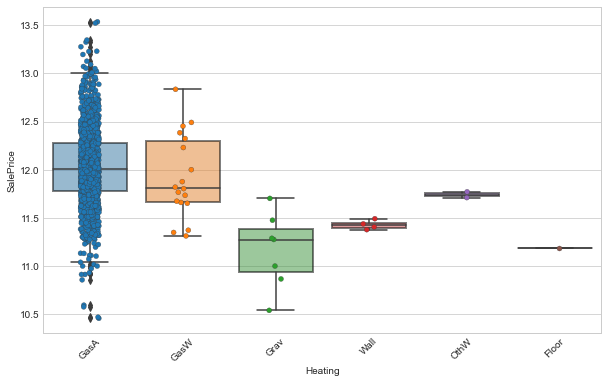

In [48]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Heating', y='SalePrice', data=train_df)
sns.stripplot(x='Heating', y='SalePrice', data=train_df, linewidth=0.3)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

### For features plotted in the above, we can see that most of data is concentrated on specific categories in each feature and there is no information gain. Let's drop these features.

In [49]:
all_data_df = all_data_df.drop('GarageQual', 1)
all_data_df = all_data_df.drop('GarageCond', 1)
all_data_df = all_data_df.drop('RoofMatl', 1)
all_data_df = all_data_df.drop('RoofStyle', 1)
all_data_df = all_data_df.drop('Street', 1)
all_data_df = all_data_df.drop('Condition2', 1)
all_data_df = all_data_df.drop('Heating', 1)

### Let's start to impute missing values. If a feature is ordinal, I will  label encode the feature. 

In [50]:
all_data_df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

### NA most likely means no masonry veneer for these houses. We can fill None for MasVnrType and 0 for MasVnrArea and.

In [51]:
all_data_df['MasVnrType'] = all_data_df['MasVnrType'].fillna('None')          

In [52]:
all_data_df['MasVnrArea'] = all_data_df['MasVnrArea'].fillna(0)          

In [53]:
# mapping used for ordinal features
qual_mapping = {'None': 0, 'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}

In [54]:
all_data_df['Electrical'].value_counts()       

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

### We can see that Electrical has only one missing value. Since most of houses have 'SBrkr' electrical system, we can set that for the missing value.

In [55]:
all_data_df['Electrical'] = all_data_df['Electrical'].fillna(all_data_df['Electrical'].mode()[0])          

In [56]:
all_data_df['BsmtQual'].value_counts()       

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [57]:
all_data_df['BsmtCond'].value_counts()       

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [58]:
all_data_df['BsmtExposure'].value_counts()       

No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64

In [59]:
all_data_df['BsmtFinType1'].value_counts()       

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [60]:
all_data_df['BsmtFinType2'].value_counts()       

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

### Missing values in these basement categorical features will likely indicate that houses don't have basement. Let's fill these values with 'None'. 

In [61]:
all_data_df['BsmtQual'] = all_data_df['BsmtQual'].fillna('None')
all_data_df['BsmtCond'] = all_data_df['BsmtCond'].fillna('None')
all_data_df['BsmtExposure'] = all_data_df['BsmtExposure'].fillna('None')
all_data_df['BsmtFinType1'] = all_data_df['BsmtFinType1'].fillna('None')
all_data_df['BsmtFinType2'] = all_data_df['BsmtFinType2'].fillna('None')

In [62]:
all_data_df = all_data_df.replace({'BsmtQual': qual_mapping})
all_data_df = all_data_df.replace({'BsmtCond': qual_mapping})

In [63]:
Bsmt_exposure_mapping = {'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
all_data_df = all_data_df.replace({'BsmtExposure': Bsmt_exposure_mapping})

In [64]:
Bsmt_finType_mapping = {'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
all_data_df = all_data_df.replace({'BsmtFinType1': Bsmt_finType_mapping})
all_data_df = all_data_df.replace({'BsmtFinType2': Bsmt_finType_mapping})

### Similar approach to the basement categorical features above. Fill missing values with 0.

In [65]:
all_data_df['BsmtFinSF1'] = all_data_df['BsmtFinSF1'].fillna(0)
all_data_df['BsmtFinSF2'] = all_data_df['BsmtFinSF2'].fillna(0)
all_data_df['BsmtUnfSF'] = all_data_df['BsmtUnfSF'].fillna(0)
all_data_df['TotalBsmtSF'] = all_data_df['TotalBsmtSF'].fillna(0)
all_data_df['BsmtFullBath'] = all_data_df['BsmtFullBath'].fillna(0)
all_data_df['BsmtHalfBath'] = all_data_df['BsmtHalfBath'].fillna(0)

In [66]:
all_data_df['GarageType'].value_counts()       

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [67]:
all_data_df['GarageFinish'].value_counts()       

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

### If there aren't garages, it wouldn't have information on types, finish, quality and condition. We can impute these missing values with 'None'.

In [68]:
all_data_df['GarageType'] = all_data_df['GarageType'].fillna('None')
all_data_df['GarageFinish'] = all_data_df['GarageFinish'].fillna('None')

### Since no garage means there aren't cars in garage, fill missing values with 0.

In [69]:
all_data_df['GarageCars'] = all_data_df['GarageCars'].fillna(0)

### Similar approaches for the rest of the features. 

<AxesSubplot:>

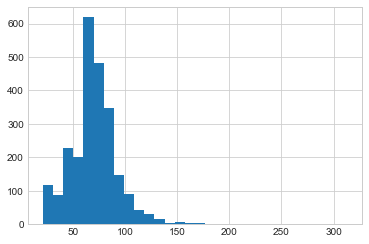

In [70]:
all_data_df['LotFrontage'].hist(bins=30)

In [71]:
all_data_df["LotFrontage"] = all_data_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [72]:
all_data_df = all_data_df.replace({'ExterCond': qual_mapping})

In [73]:
all_data_df = all_data_df.replace({'ExterQual': qual_mapping})

In [74]:
all_data_df["Functional"] = all_data_df["Functional"].fillna("Typ")

func_mapping = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
all_data_df = all_data_df.replace({'Functional': func_mapping})

In [75]:
all_data_df['KitchenQual'].value_counts()       

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [76]:
all_data_df['KitchenQual'] = all_data_df['KitchenQual'].fillna(all_data_df['KitchenQual'].mode()[0])

all_data_df = all_data_df.replace({'KitchenQual': qual_mapping})

In [77]:
lotShape_mapping = {'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
all_data_df = all_data_df.replace({'LotShape': lotShape_mapping})

In [78]:
all_data_df = all_data_df.replace({'HeatingQC': qual_mapping})

In [79]:
street_mapping = {'Grvl':0, 'Pave':1}
all_data_df = all_data_df.replace({'Street': street_mapping})

In [80]:
PavedDrive_mapping = {'N':0, 'P':1, 'Y':2}
all_data_df = all_data_df.replace({'PavedDrive': PavedDrive_mapping})

In [81]:
all_data_df['MSZoning'] = all_data_df['MSZoning'].fillna(all_data_df['MSZoning'].mode()[0])

In [82]:
all_data_df['SaleType'] = all_data_df['SaleType'].fillna(all_data_df['SaleType'].mode()[0])

In [83]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   LotShape       2919 non-null   int64  
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  BldgType       2919 non-null   object 
 12  HouseStyle     2919 non-null   object 
 13  OverallQual    2919 non-null   int64  
 14  OverallCond    2919 non-null   int64  
 15  YearBuilt      2919 non-null   int64  
 16  YearRemodAdd   2919 non-null   int64  
 17  MasVnrType     2919 non-null   object 
 18  MasVnrAr

### We now handled all missing data and characters features are now either encoded numerically or divided into categories

### Next, before we build prediction model, create dummy variables for categorical features.

In [84]:
all_data_df = pd.get_dummies(all_data_df)

In [85]:
train_df = all_data_df[:ntrain]
test_df = all_data_df[ntrain:]

In [86]:
Y = train_df['SalePrice']

# delete ID
feature_names = train_df.columns.values[1:]

# delete SalePrice
salePrice_index = np.argwhere(feature_names == 'SalePrice')
feature_names = np.delete(feature_names, salePrice_index)

In [87]:
X = train_df[feature_names]

In [89]:
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 400, num = 3)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [150, 275, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


### Build Random Forest model.

In [90]:
model = RandomForestRegressor()


clf = RandomizedSearchCV(model, param_distributions = random_grid, cv=10,n_iter = 100, scoring = 'r2', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 10
folds = KFold(n_splits = numFolds, shuffle = True)
print(folds)

# stores models
estimators = []

# stores pred. numpy index used for cross validation
val_ind_lst = []

# stores y_val used for cross validation 
y_val_lst = []

pred = np.zeros(len(X))
for train_index, val_index in folds.split(X):
    print("new fold")
    X_train, X_val = X.iloc[train_index,:], X.iloc[val_index,:]
    y_train, y_val = Y.iloc[train_index].values.ravel(), Y.iloc[val_index].values.ravel()
    print("fitting")
    clf.fit(X_train, y_train)

    estimators.append(clf.best_estimator_)
    val_ind_lst.append(val_index)
    y_val_lst.append(y_val)
    
    print(clf.best_estimator_)
    pred[val_index] = clf.predict(X_val)
    r_score = r2_score(y_val, pred[val_index])
    print("r score",r_score)

KFold(n_splits=10, random_state=None, shuffle=True)
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 10.7min finished


RandomForestRegressor(bootstrap=False, max_depth=80, max_features='sqrt',
                      min_samples_split=10, n_estimators=275)
r score 0.8666451356107702
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.3min finished


RandomForestRegressor(bootstrap=False, max_depth=90, max_features='sqrt',
                      min_samples_split=5, n_estimators=150)
r score 0.8995954544037281
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  7.6min finished


RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=150)
r score 0.901838420755752
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.0min finished


RandomForestRegressor(bootstrap=False, max_depth=110, max_features='sqrt',
                      n_estimators=400)
r score 0.8829098064433477
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  8.7min finished


RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      n_estimators=400)
r score 0.8590651376709051
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 12.4min finished


RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=275)
r score 0.9106271208859262
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 24.9min finished


RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      n_estimators=400)
r score 0.8979998690160231
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 18.2min finished


RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=5, n_estimators=150)
r score 0.7695175897530218
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 21.1min finished


RandomForestRegressor(bootstrap=False, max_depth=90, max_features='sqrt',
                      n_estimators=150)
r score 0.8973557238487411
new fold
fitting
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 11.0min finished


RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=400)
r score 0.9180674714097372


In [91]:
model = estimators[9]
model

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=400)

### Before we make predictions, let's plot feature importance.

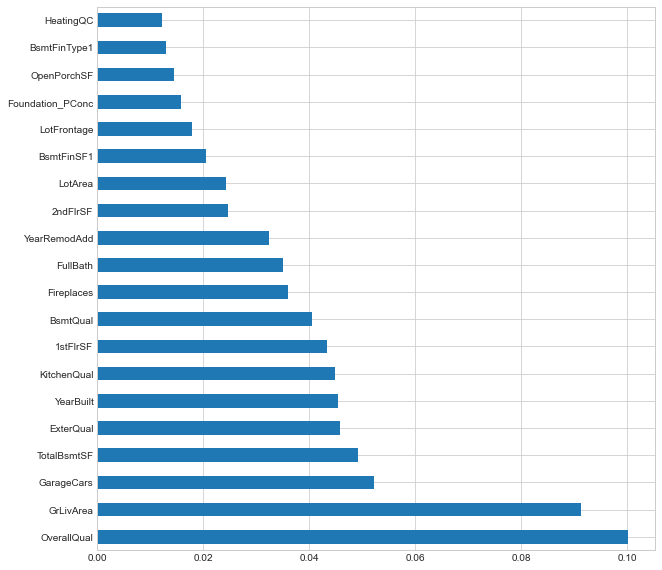

In [92]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [93]:
feature_names = list(X.columns)

#need to reverse the log to the real values
pred = np.expm1(model.predict(test_df[feature_names]))

In [94]:
submission_rf = pd.DataFrame({'Id':test_df['Id'],'SalePrice':pred})

submission_rf.head(10)

Id      SalePrice
1460  1461  122609.506674
1461  1462  153930.959475
1462  1463  181582.166531
1463  1464  188411.102373
1464  1465  188497.371230
1465  1466  183423.038369
1466  1467  172543.238045
1467  1468  176119.827697
1468  1469  179657.367895
1469  1470  127567.553279

In [95]:
filename = 'Predictions1_rf.csv'

submission_rf.to_csv(filename,index=False)


print('Saved file: ' + filename)

Saved file: Predictions1_rf.csv
